# Assignment 5 - Ensemble Learning


## Imports

In [1]:
import numpy as np
from scipy.special import comb
from math import ceil
import matplotlib.pyplot as plt

## Assignment 3

### Helper Functions

In [2]:
def majority_vote(N, m, p):
    # start with probability of zero
    prob = 0

    # add probability of success for different combinations
    for i in range(m, N + 1):
        prob += comb(N, i) * p**i * (1 - p)**(N - i)

    # return probability of success based on majority voting
    return prob

In [3]:
def compute_p_success(n1, n2, p1, p2, w1=1, w2=1):
    # compute total (weighted) votes
    N = (n1 * w1) + (n2 * w2)

    # majority if the strong learner is correct
    m_correct = ceil((N/2) - (w1*n1))

    # majority if the strong learner is incorrect
    m_incorrect = ceil(N/2)
        
    # if N is even, we need 1 extra to reach a majority
    if((N % 2 ) == 0):
        m_correct += 1
        m_incorrect += 1

    # calculate probability
    prob = p1 * majority_vote(n2, m_correct, p2) + \
           (1 - p1) * majority_vote(n2, m_incorrect, p2)

    # return probability of correct prediction
    return prob 

In [4]:
def compute_weight(err):
    alpha = np.log((1 - err) / err)

    return alpha

### 3.A

In [5]:
p_strong = 0.8
p_weak = 0.6
n_weak = 10
n_strong = 1

In [17]:
p_ensemble = compute_p_success(n_strong, n_weak, p_strong, p_weak)
print(f"Ensemble probability for a correct prediction: {p_ensemble:.3f}")

Ensemble probability for a correct prediction: 0.794


### 3.B

In [7]:
w_weak = 1
max_w = 15
w_strong = np.arange(1, max_w + 1)

In [8]:
probs = []
for i in range(len(w_strong)):
    p = compute_p_success(n_strong, n_weak, p_strong, p_weak, w_strong[i], w_weak)
    probs.append(p)

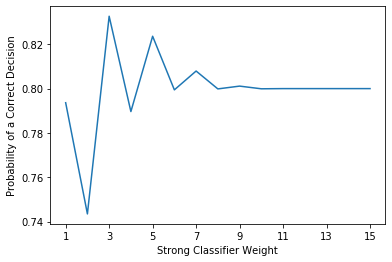

In [9]:
plt.plot(np.arange(1 ,max_w + 1), probs)
plt.xticks(np.arange(1, max_w + 1, 2))
plt.xlabel("Strong Classifier Weight")
plt.ylabel("Probability of a Correct Decision")
plt.savefig("strong_classifier_weights.png")
plt.show()

### 3.C

In [10]:
err_strong = 1 - p_strong
err_weak = 1 - p_weak

In [11]:
print(f"Strong Classifier Weight: {compute_weight(err_strong):.3f}")
print(f"Weak Classifier Weight: {compute_weight(err_weak):.3f}")

Strong Classifier Weight: 1.386
Weak Classifier Weight: 0.405


### 3.D

In [12]:
errors = np.arange(0.01, 1, 0.01)

In [13]:
weights = []
for error in errors:
    w = compute_weight(error)
    weights.append(w)

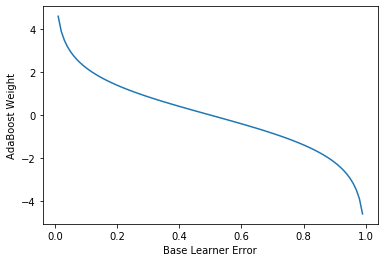

In [14]:
plt.plot(errors, weights)
plt.xlabel("Base Learner Error")
plt.ylabel("AdaBoost Weight")
plt.savefig("adaboost_weights.png")
plt.show()